In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 直方图计算函数
def GetHist(img):
    img = img.flatten()
    img = img.tolist()
    hist = []
    for i in range(0, 256):
        hist.append(img.count(i))
    return hist

# 3. 图像基本运算

## 3.1 点运算

### 3.1.1 线性点运算

s = ar + b

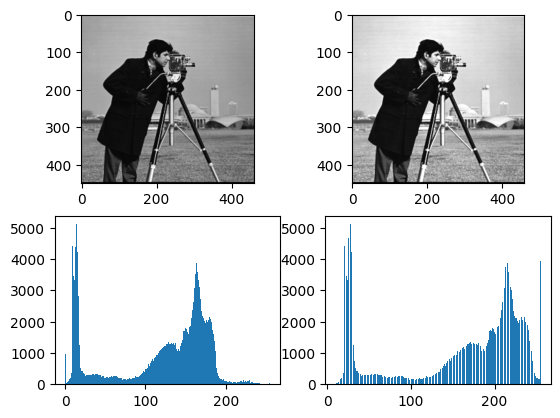

In [5]:
# 假设 s = 1.25r + 10
image_path = './png_files/1.png'

image = cv2.imread(image_path, 0)
image_hist = GetHist(image)

new_image = image * 1.25 + 10.0

new_image[new_image>255] = 255
new_image_hist = GetHist(new_image)

plt.figure()
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.subplot(222)
plt.imshow(new_image, cmap='gray')
plt.subplot(223)
# plt.bar(x=range(0, 256), height=image_hist, width=0.5)
plt.hist(image.ravel(), 256)
plt.subplot(224)
plt.hist(new_image.ravel(), 256)
# plt.bar(x=range(0, 256), height=new_image_hist, width=1.5)
plt.show()

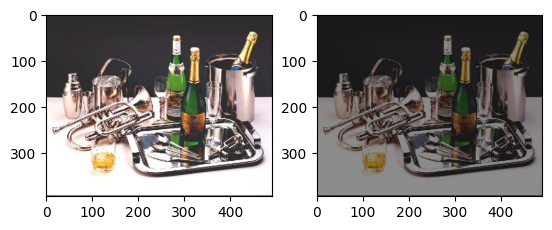

In [8]:
# 假设 s = 0.75r
image_path = './png_files/2.png'

image = cv2.imread(image_path)

new_image = image * 0.55
new_image = new_image.astype(np.uint8)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(new_image)
plt.show()

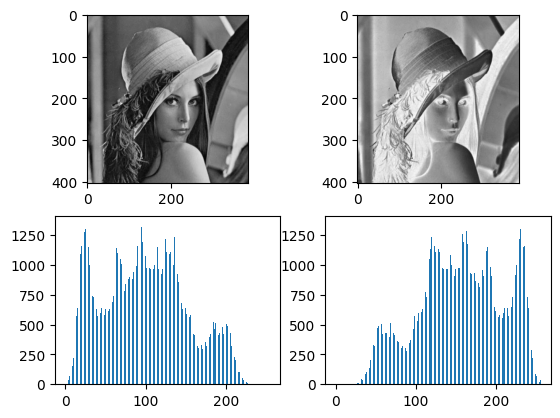

In [11]:
# 假设 s = -r
image_path = './png_files/3.png'

image = cv2.imread(image_path, 0)
image_hist = GetHist(image)

new_image = 255 - image
new_image_hist = GetHist(new_image)

plt.figure()
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.subplot(222)
plt.imshow(new_image, cmap='gray')
plt.subplot(223)
plt.bar(x=range(0, 256), height=image_hist, width=0.5)
plt.subplot(224)
plt.bar(x=range(0, 256), height=new_image_hist, width=0.5)
plt.show()

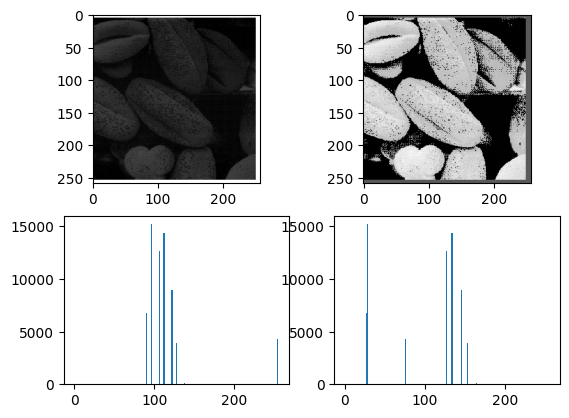

In [16]:
# 分段线性点运算
a = 100
b = 150
image_path = './png_files/4.png'

image = cv2.imread(image_path, 0)
image_hist = GetHist(image)

new_image = np.zeros(shape=(image.shape[0], image.shape[1]))

new_image[image<a] = image[image<a] * 0.3
new_image[(a<=image) & (image<b)] = image[(a<=image) & (image<b)] * 1.2
new_image[image>=b] = image[image>=b] * 0.3
new_image = new_image.astype(np.uint8)
new_image_hist = GetHist(new_image)

plt.figure()
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.subplot(222)
plt.imshow(new_image, cmap='gray')
plt.subplot(223)
plt.bar(x=range(0, 256), height=image_hist, width=1.5)
plt.subplot(224)
plt.bar(x=range(0, 256), height=new_image_hist, width=1.5)
plt.show()

### 3.1.2 非线性点运算

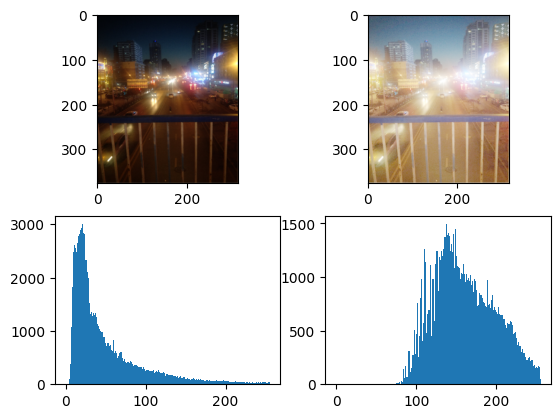

In [2]:
# 对数运算：s = c log(1 + r)

c = 1

image_path = './png_files/5.png'

image = cv2.imread(image_path)
image_hist = GetHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

new_image = c * np.log(1 + image.astype(float))
new_image = cv2.normalize(new_image, new_image, 0, 255, cv2.NORM_MINMAX)

new_image = new_image.astype(np.uint8)
new_image_hist = GetHist(cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY))

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(new_image)
plt.subplot(223)
plt.bar(x=range(0, 256), height=image_hist, width=1.5)
plt.subplot(224)
plt.bar(x=range(0, 256), height=new_image_hist, width=1.5)
plt.show()

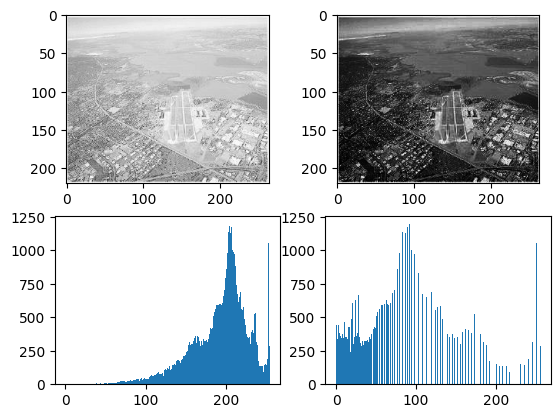

In [19]:
# 幂次变换： s = cr^γ (γ>=1)
c = 1
gamma = 5.0

image_path = './png_files/6.png'

image = cv2.imread(image_path, 0)
image_hist = GetHist(image)

new_image = c * (image**gamma)
new_image = cv2.normalize(new_image, new_image, 0, 255, cv2.NORM_MINMAX)

new_image = new_image.astype(np.uint8)
new_image_hist = GetHist(new_image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(new_image)
plt.subplot(223)
plt.bar(x=range(0, 256), height=image_hist, width=0.95)
plt.subplot(224)
plt.bar(x=range(0, 256), height=new_image_hist, width=0.95)
plt.show()

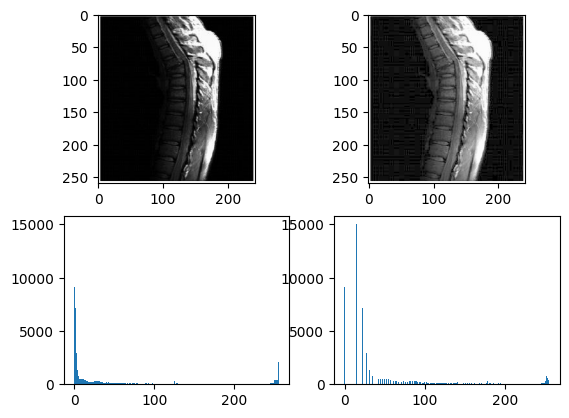

In [3]:
# 幂次变换： s = cr^γ (γ<1)
c = 1
gamma = 0.5

image_path = './png_files/7.png'

image = cv2.imread(image_path, 0)
image_hist = GetHist(image)

new_image = c * (image**gamma)
new_image = cv2.normalize(new_image, new_image, 0, 255, cv2.NORM_MINMAX)

new_image = new_image.astype(np.uint8)
new_image_hist = GetHist(new_image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(new_image)
plt.subplot(223)
plt.bar(x=range(0, 256), height=image_hist, width=0.95)
plt.subplot(224)
plt.bar(x=range(0, 256), height=new_image_hist, width=0.95)
plt.show()

## 3.2 代数运算

### 3.2.1 加法运算

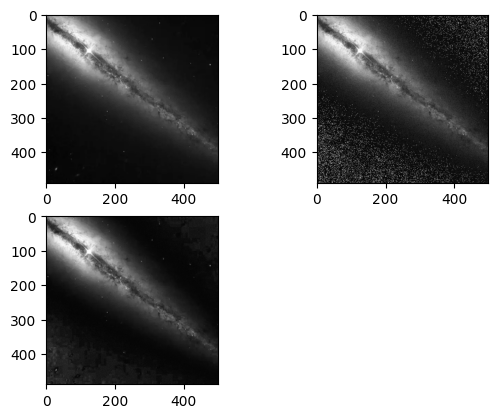

In [16]:
# 1.可以用来去除叠加性噪声
def gasuss_noise(image, mean=0, var=0.001):
    ''' 
        添加高斯噪声
        mean : 均值 
        var : 方差
    '''
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)

    return out

image = cv2.imread('./png_files/8.png', 0)
add_n_averaged = np.zeros(shape=image.shape)
num_of_iters = 16
for i in range(num_of_iters):
    addictive_image = gasuss_noise(image)
    add_n_averaged += addictive_image.astype(float)
add_n_averaged /= num_of_iters
add_n_averaged.astype(np.uint8)

plt.figure()
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.subplot(222)
plt.imshow(addictive_image, cmap='gray')
plt.subplot(223)
plt.imshow(add_n_averaged, cmap='gray')
plt.show()

(400, 400, 3)
(400, 400, 3)


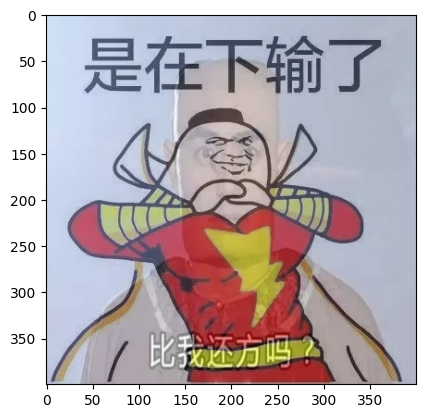

In [25]:
# 2. 生成图像叠加效果
image1 = cv2.imread('./png_files/11.png')
image2 = cv2.imread('./png_files/12.png')

image1 = cv2.resize(image1, image2.shape[:2])

print(image1.shape)
print(image2.shape)

new_image = image1*0.5 + image2*0.5

new_image = new_image.astype(np.uint8)

new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(new_image)
plt.show()

### 3.2.2 减法运算

In [6]:
# 帧间差分法提取移动物体
address = './png_files/street.mp4'
cap = cv2.VideoCapture(address)

# Create windows
cv2.namedWindow("frame", 0)
cv2.namedWindow("diff_image", 0)
frame_buffer = []
len_frame_buffer = 2

while (1):

    ret, frame = cap.read()
    
    if not ret:
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    frame_buffer.append(frame)

    if len(frame_buffer) > len_frame_buffer:
        frame_buffer.pop(0)
    elif frame_buffer != len_frame_buffer:
        continue

    

    frame_diff = cv2.absdiff(frame_buffer[0], frame_buffer[1])

    cv2.imshow('frame', frame)
    cv2.imshow('diff_image', frame_diff)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

(400, 400, 3)
(400, 400, 3)


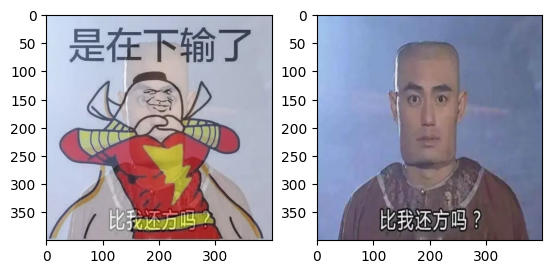

In [7]:
# 分离混合图像
image1 = cv2.imread('./png_files/11.png')
image2 = cv2.imread('./png_files/12.png')

image1 = cv2.resize(image1, image2.shape[:2])

print(image1.shape)
print(image2.shape)

new_image = image1*0.5 + image2*0.5
restored_image1 = 2*(new_image - image2*0.5)

new_image = new_image.astype(np.uint8)
restored_image1 = restored_image1.astype(np.uint8)

new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
restored_image1 = cv2.cvtColor(restored_image1, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(121)
plt.imshow(new_image)
plt.subplot(122)
plt.imshow(restored_image1)
plt.show()

### 3.2.3 乘法运算

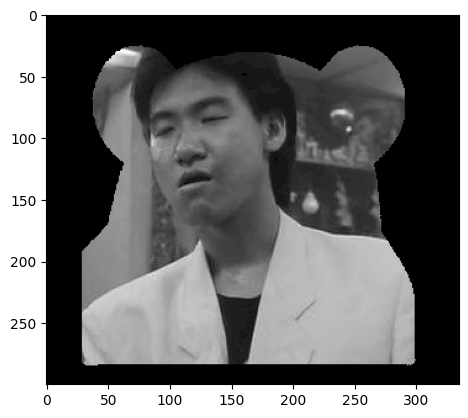

In [3]:
panda_head = cv2.imread('./png_files/13.png', 0)
yyyz = cv2.imread('./png_files/15.png', 0)

panda_head = cv2.resize(panda_head, (yyyz.shape[1],yyyz.shape[0]))
panda_head[panda_head>0] = 1

yyyz_pandaed = yyyz * panda_head

plt.figure()
plt.imshow(yyyz_pandaed, cmap='gray')
plt.show()